<a href="https://colab.research.google.com/github/honeydewsago/MachineLearningCW/blob/main/FraudPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install pandas
# pip install seaborn
# pip install imblearn

##### Connect to Google Drive from Colab (optional)

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

fraud_path = '/content/drive/MyDrive/datasets/fraud.csv'
fraud = pd.read_csv(fraud_path)

fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Analysis and Preprocessing

### Data Reading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file into a DataFrame
fraud = pd.read_csv('fraud.csv')
fraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
fraud.shape

(6362620, 11)

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
print("\nSummary statistics:")
fraud.describe()


Summary statistics:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Data Cleaning

In [6]:
# Check missing values
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Check duplicate data
print("Duplicate Rows:")
fraud[fraud.duplicated()]

Duplicate Rows:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [8]:
# Separate out categorical columns
print("Categorical Columns:")
categorical_columns = fraud.drop('isFraud', axis=1).select_dtypes(include=['object']).columns.tolist()
categorical_columns

Categorical Columns:


['type', 'nameOrig', 'nameDest']

In [9]:
# Separate out numeric columns
print("Numeric Columns:")
numeric_columns = fraud.drop('isFraud', axis=1).select_dtypes(include=['number']).columns.tolist()
numeric_columns

Numeric Columns:


['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFlaggedFraud']

### Remove Data Outliers

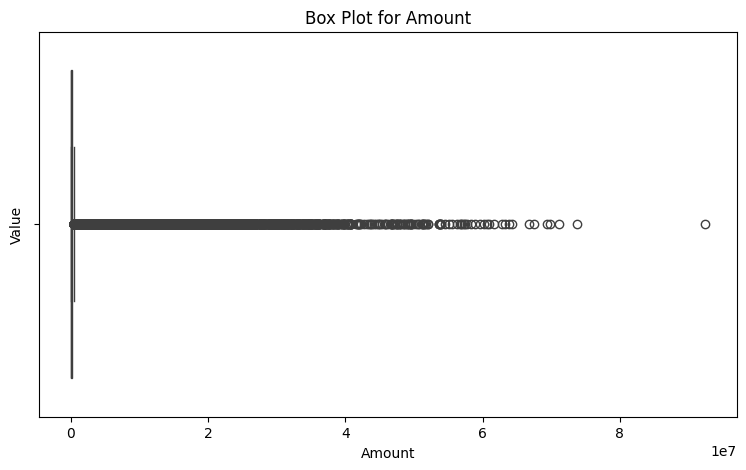

In [10]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='amount', data=fraud)
plt.title('Box Plot for Amount')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.show()

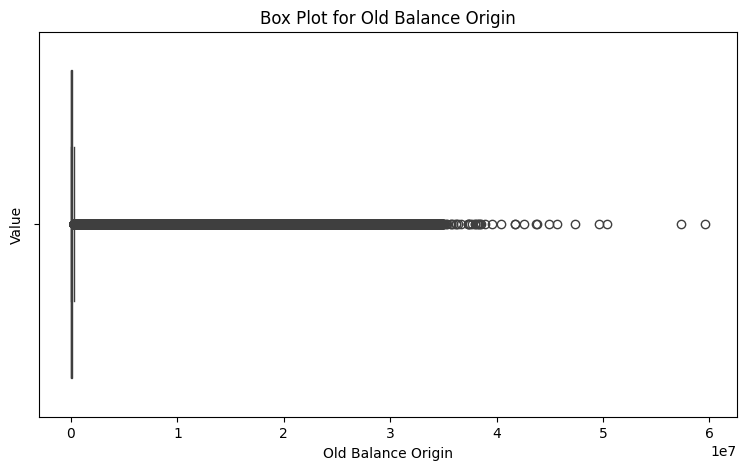

In [11]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='oldbalanceOrg', data=fraud)
plt.title('Box Plot for Old Balance Origin')
plt.xlabel('Old Balance Origin')
plt.ylabel('Value')
plt.show()

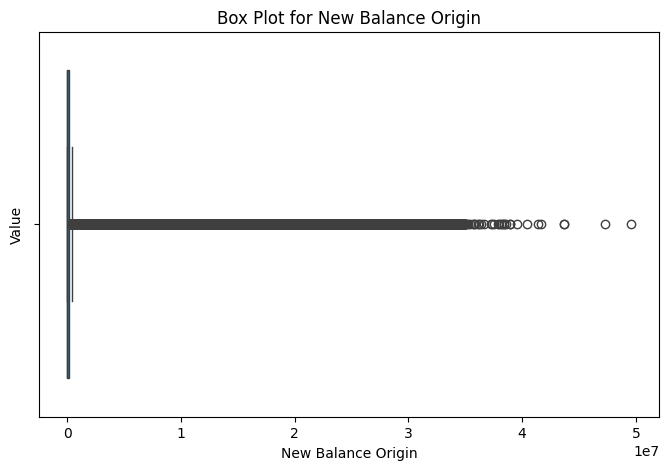

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='newbalanceOrig', data=fraud)
plt.title('Box Plot for New Balance Origin')
plt.xlabel('New Balance Origin')
plt.ylabel('Value')
plt.show()

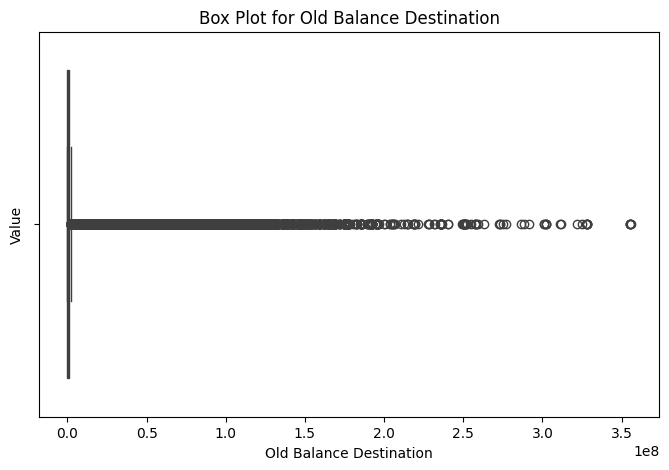

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='oldbalanceDest', data=fraud)
plt.title('Box Plot for Old Balance Destination')
plt.xlabel('Old Balance Destination')
plt.ylabel('Value')
plt.show()

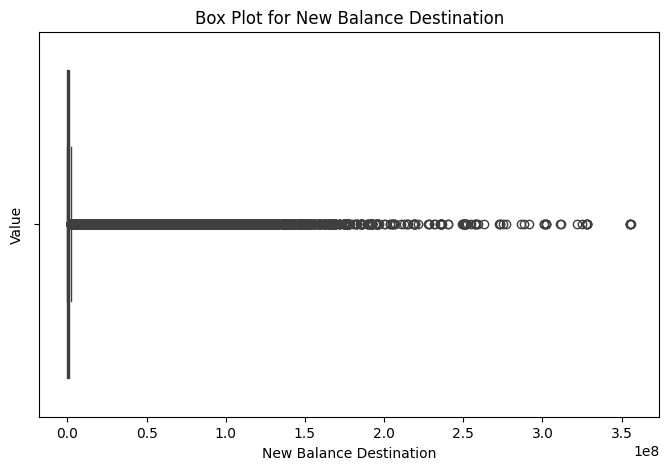

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='oldbalanceDest', data=fraud)
plt.title('Box Plot for New Balance Destination')
plt.xlabel('New Balance Destination')
plt.ylabel('Value')
plt.show()

In [15]:
def remove_outliers(df, column_name):
    """
    Remove outliers from a specific column in a DataFrame using IQR method.

    Parameters:
    - df: DataFrame
    - column_name: str, the column containing numerical data

    Returns:
    - pd.Series: Column with outliers removed
    """

    # Calculate quartiles and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper limit
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Remove outliers
    outliers_removed = df[column_name][(df[column_name] > lower_limit) & (df[column_name] < upper_limit)]

    return outliers_removed

In [16]:
fraud['amount'] = remove_outliers(fraud, 'amount')
fraud['oldbalanceOrg'] = remove_outliers(fraud, 'oldbalanceOrg')
fraud['newbalanceOrig'] = remove_outliers(fraud, 'newbalanceOrig')
fraud['oldbalanceDest'] = remove_outliers(fraud, 'oldbalanceDest')
fraud['newbalanceDest'] = remove_outliers(fraud, 'newbalanceDest')

In [19]:
fraud.isnull().sum()

step                    0
type                    0
amount             338078
nameOrig                0
oldbalanceOrg     1112507
newbalanceOrig    1053391
nameDest                0
oldbalanceDest     786135
newbalanceDest     738527
isFraud                 0
isFlaggedFraud          0
dtype: int64

In [20]:
# Replace NaN values with the mean
fraud['amount'].fillna(fraud['amount'].mean(),inplace=True)
fraud['oldbalanceOrg'].fillna(fraud['oldbalanceOrg'].mean(),inplace=True)
fraud['newbalanceOrig'].fillna(fraud['newbalanceOrig'].mean(),inplace=True)
fraud['oldbalanceDest'].fillna(fraud['oldbalanceDest'].mean(),inplace=True)
fraud['newbalanceDest'].fillna(fraud['newbalanceDest'].mean(),inplace=True)

In [21]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Box Plot After Removing Data Outliers

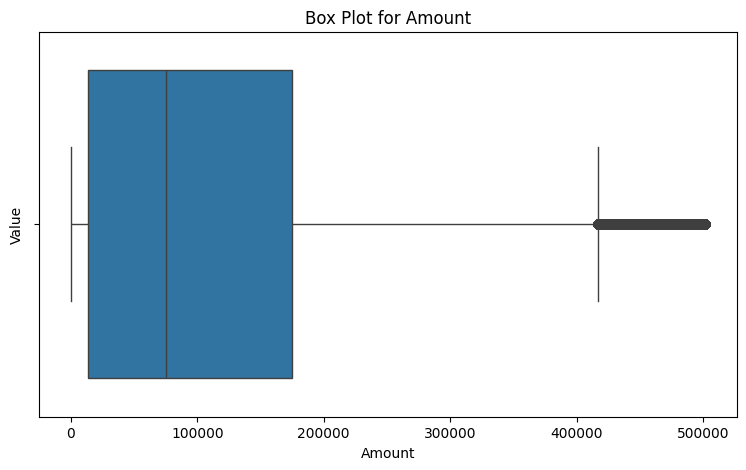

In [22]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='amount', data=fraud)
plt.title('Box Plot for Amount')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.show()

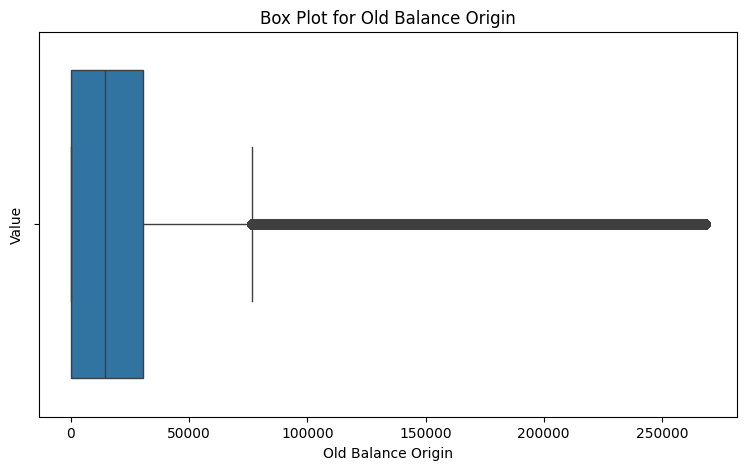

In [23]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='oldbalanceOrg', data=fraud)
plt.title('Box Plot for Old Balance Origin')
plt.xlabel('Old Balance Origin')
plt.ylabel('Value')
plt.show()

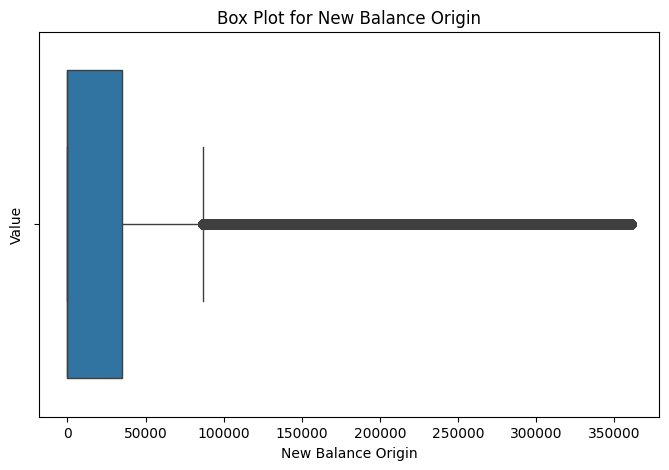

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='newbalanceOrig', data=fraud)
plt.title('Box Plot for New Balance Origin')
plt.xlabel('New Balance Origin')
plt.ylabel('Value')
plt.show()

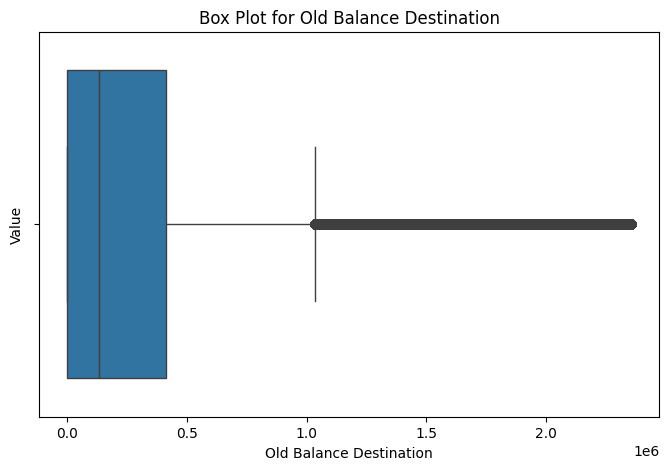

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='oldbalanceDest', data=fraud)
plt.title('Box Plot for Old Balance Destination')
plt.xlabel('Old Balance Destination')
plt.ylabel('Value')
plt.show()

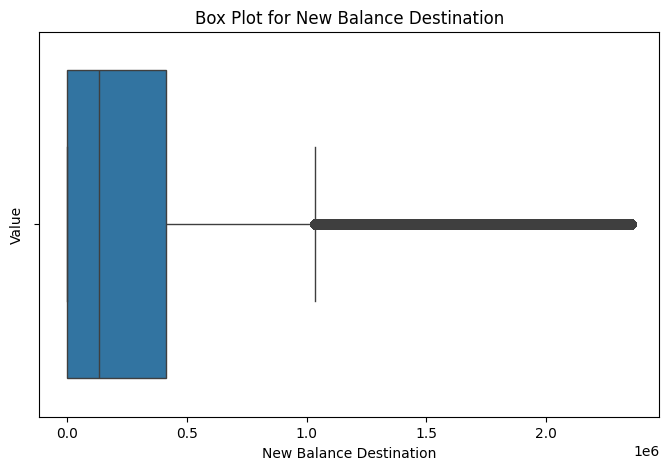

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='oldbalanceDest', data=fraud)
plt.title('Box Plot for New Balance Destination')
plt.xlabel('New Balance Destination')
plt.ylabel('Value')
plt.show()

### Data Visualization

In [27]:
fraud.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

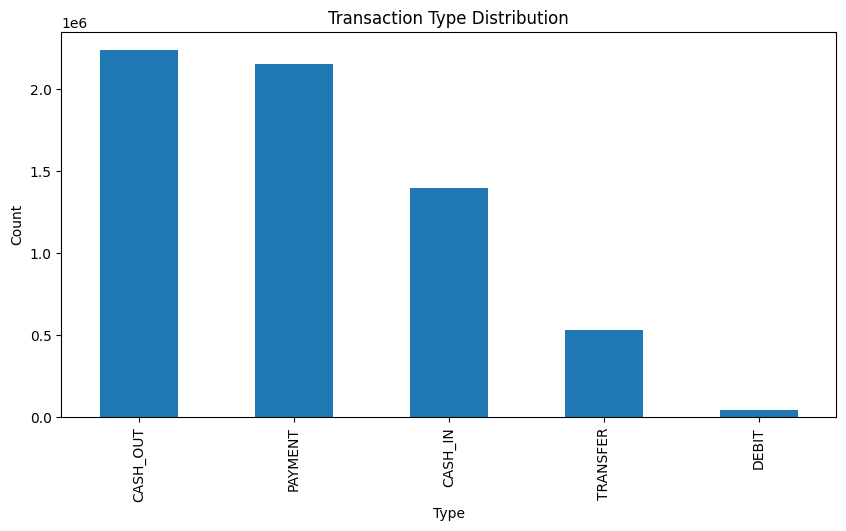

In [28]:
# Data distribution for 'type'
plt.figure(figsize=(10, 5))
fraud['type'].value_counts().plot(kind='bar')
plt.title('Transaction Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

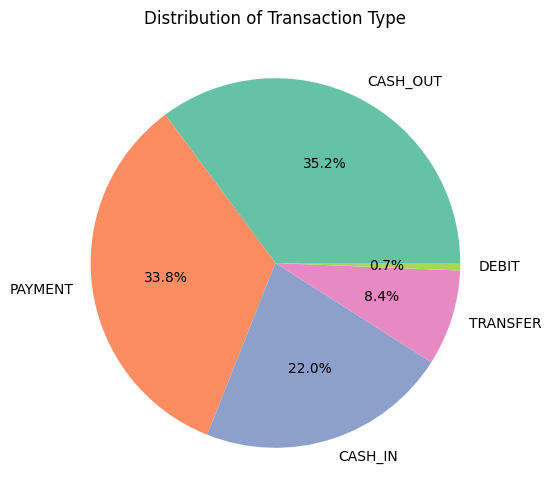

In [29]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud['type'].value_counts(), labels=fraud['type'].value_counts().keys(), autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Transaction Type')
plt.show()

In [30]:
fraud.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

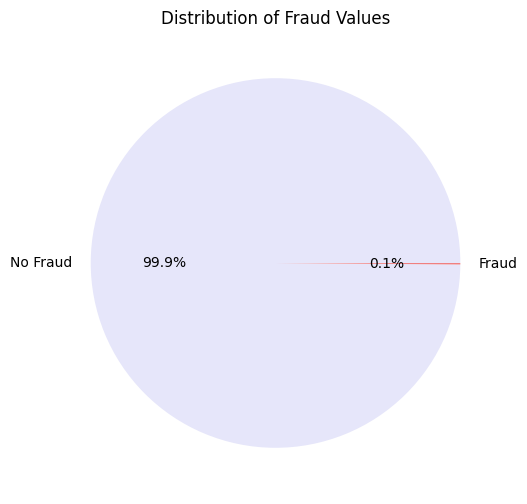

In [31]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud['isFraud'].value_counts(), labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', colors=['lavender', 'lightcoral'])
plt.title('Distribution of Fraud Values')
plt.show()

In [32]:
fraud.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

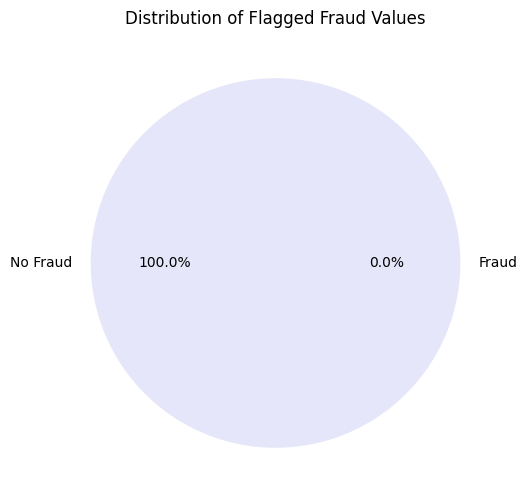

In [33]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud['isFlaggedFraud'].value_counts(), labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', colors=['lavender'])
plt.title('Distribution of Flagged Fraud Values')
plt.show()

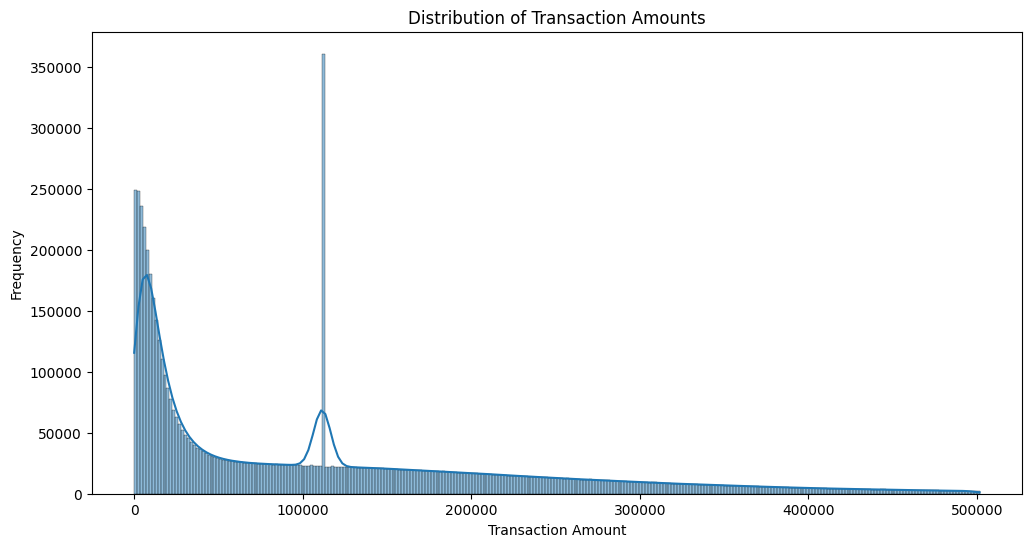

In [34]:
# Plotting a distribution plot for 'amount'
plt.figure(figsize=(12, 6))
sns.histplot(fraud['amount'], kde=True, edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

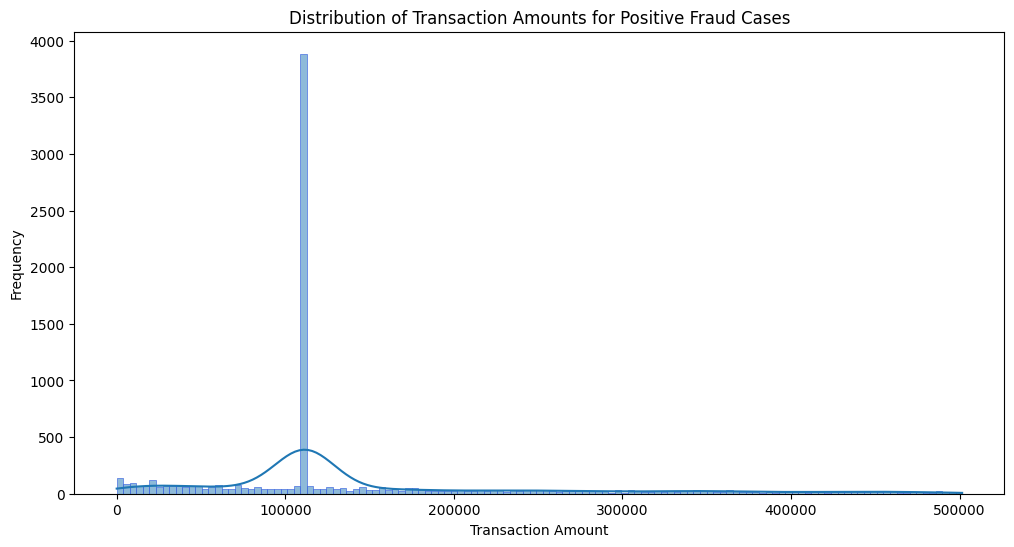

In [35]:
# Plotting a distribution plot for 'amount'
positive_fraud = fraud[fraud.isFraud == 1]

plt.figure(figsize=(12, 6))
sns.histplot(positive_fraud['amount'], kde=True, edgecolor='royalblue')
plt.title('Distribution of Transaction Amounts for Positive Fraud Cases')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

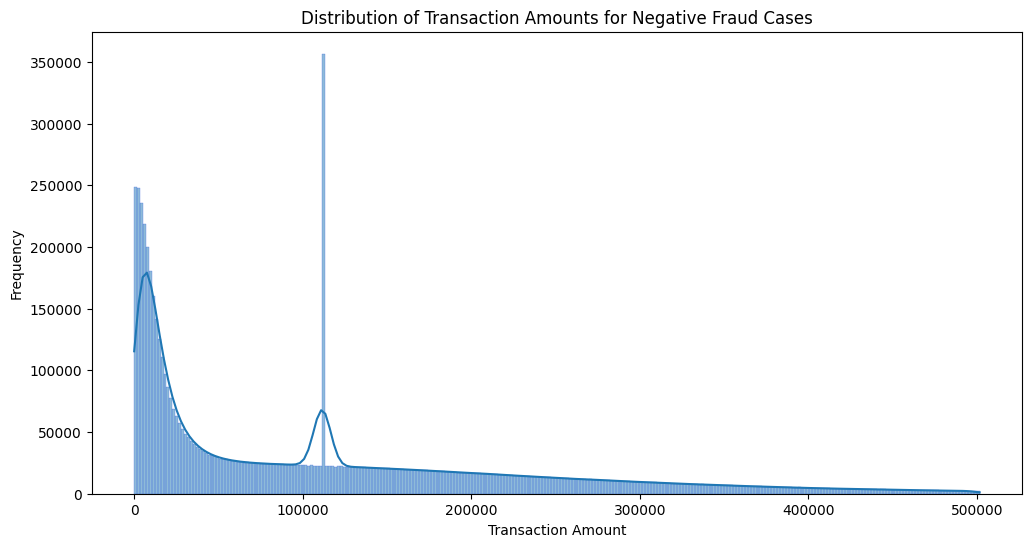

In [36]:
# Plotting a distribution plot for 'amount'
negative_fraud = fraud[fraud.isFraud == 0]

plt.figure(figsize=(12, 6))
sns.histplot(negative_fraud['amount'], kde=True, edgecolor='royalblue')
plt.title('Distribution of Transaction Amounts for Negative Fraud Cases')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Calculate the correlation matrix (excluding non-numeric columns)
correlation_matrix = fraud[numeric_columns].corr()
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
step,1.000000,-0.010214,-3.185094e-03,-0.006705,-0.013227,-0.019419,3.277415e-03
amount,-0.010214,1.000000,-3.120727e-02,-0.021686,0.345874,0.390749,4.482413e-04
oldbalanceOrg,-0.003185,-0.031207,1.000000e+00,0.452565,-0.080871,-0.080735,1.990359e-18
newbalanceOrig,-0.006705,-0.021686,4.525648e-01,1.000000,-0.068971,-0.126110,4.591168e-04
oldbalanceDest,-0.013227,0.345874,-8.087074e-02,-0.068971,1.000000,0.828283,-1.085941e-03
newbalanceDest,-0.019419,0.390749,-8.073522e-02,-0.126110,0.828283,1.000000,-1.148026e-03
isFlaggedFraud,0.003277,0.000448,1.990359e-18,0.000459,-0.001086,-0.001148,1.000000e+00


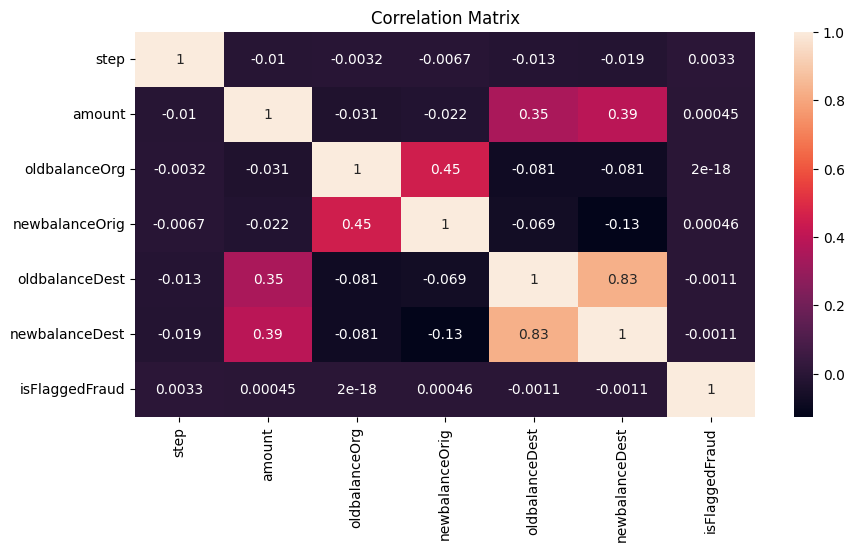

In [38]:
# checking for multicollinearity
plt.figure(figsize=[10,5])
sns.heatmap(fraud[numeric_columns].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

### Data Preprocessing

In [39]:
fraud = fraud.drop(['nameOrig', 'nameDest'], axis=1)
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [40]:
fraud = pd.get_dummies(fraud, columns=['type'], prefix='type', drop_first=True)
fraud.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


In [41]:
# Convert boolean columns to int64
bool_columns = ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
fraud[bool_columns] = fraud[bool_columns].astype('int64')

In [42]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   type_CASH_OUT   int64  
 9   type_DEBIT      int64  
 10  type_PAYMENT    int64  
 11  type_TRANSFER   int64  
dtypes: float64(5), int64(7)
memory usage: 582.5 MB


# Data Split

### Data Split into X and Y

In [43]:
x = fraud.drop(columns=['isFraud'])
y = fraud['isFraud']

In [44]:
y.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### Feature Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### Data Split to Train and Test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Print the shapes of the resulting sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (4453834, 11)
x_test shape: (1908786, 11)
y_train shape: (4453834,)
y_test shape: (1908786,)


# Model Training and Evaluation

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Instantiate Logistic Regression model
model_lr = LogisticRegression()

# Fit the model on the training data
model_lr.fit(x_train, y_train)

LogisticRegression()

### Evaluation of Logistic Regression

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# Predictions on the test set
y_pred_lr = model_lr.predict(x_test)

In [ ]:
# Evaluate the performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print results
print("Logistic Regression Results:")
print("Accuracy:", accuracy_lr)

Logistic Regression Results:
Accuracy: 0.9987316545699727


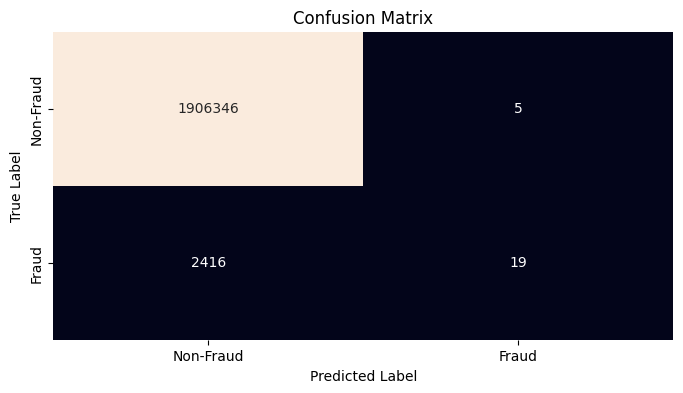

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
classification_report_lr = classification_report(y_test, y_pred_lr)
print("\nClassification Report:\n", classification_report_lr)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.79      0.01      0.02      2435

    accuracy                           1.00   1908786
   macro avg       0.90      0.50      0.51   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
cv_scores = cross_val_score(model_lr, x, y, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.99870902 0.99871044 0.99717852]
Mean Accuracy: 0.9981993266123553


### Fine Tune 1 - Handle Imbalance Class with Data Sampling

In [41]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=0)

# Perform undersampling
x_sampled,y_sampled = under_sampler.fit_resample(x, y)

In [35]:
y_sampled.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [36]:
scaler = MinMaxScaler()
x_sampled = scaler.fit_transform(x)

In [40]:
x_train_sampled, x_test_sampled, y_train_sampled, y_test_sampled = train_test_split(x_sampled, y_sampled, test_size=0.30, random_state=42)

# Print the shapes of the resulting sets
print("x_train_sampled shape:", x_train_sampled.shape)
print("x_test_sampled shape:", x_test_sampled.shape)
print("y_train_sampled shape:", y_train_sampled.shape)
print("y_test_sampled shape:", y_test_sampled.shape)

x_train_sampled shape: (11498, 11)
x_test_sampled shape: (4928, 11)
y_train_sampled shape: (11498,)
y_test_sampled shape: (4928,)


In [ ]:
# Instantiate Logistic Regression model
model_lr1 = LogisticRegression()

# Fit the model on the training data
model_lr1.fit(x_train_sampled, y_train_sampled)

LogisticRegression()

In [ ]:
# Predictions on the test set
y_pred_lr1 = model_lr1.predict(x_test_sampled)

In [ ]:
# Evaluate the performance
accuracy_lr1 = accuracy_score(y_test_sampled, y_pred_lr1)

# Print results
print("Logistic Regression Results:")
print("Accuracy:", accuracy_lr1)

Logistic Regression Results:
Accuracy: 0.861810064935065


In [ ]:
classification_report_lr1 = classification_report(y_test_sampled, y_pred_lr1)
print("\nClassification Report:\n", classification_report_lr1)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      2479
           1       0.84      0.90      0.87      2449

    accuracy                           0.86      4928
   macro avg       0.86      0.86      0.86      4928
weighted avg       0.86      0.86      0.86      4928



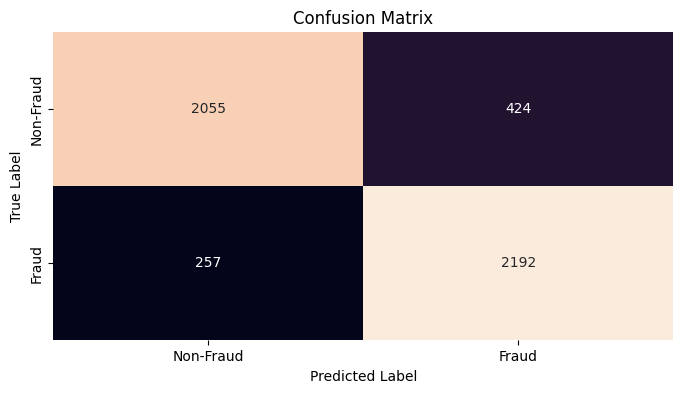

In [ ]:
conf_matrix_lr1 = confusion_matrix(y_test_sampled, y_pred_lr1)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_lr1, annot=True, fmt="d", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
cv_scores1 = cross_val_score(model_lr1, x_sampled, y_sampled, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores1)
print("Mean Accuracy:", cv_scores1.mean())

Cross-Validation Scores: [0.55021914 0.87415525 0.84584475]
Mean Accuracy: 0.7567397126856585


### Fine Tune 2 - Regularization with L1 (Lasso)

In [ ]:
# Instantiate Logistic Regression model
model_lr2 = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model on the training data
model_lr2.fit(x_train_sampled, y_train_sampled)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
# Predictions on the test set
y_pred_lr2 = model_lr2.predict(x_test_sampled)

In [ ]:
# Evaluate the performance
accuracy_lr2 = accuracy_score(y_test_sampled, y_pred_lr2)

# Print results
print("Logistic Regression Results:")
print("Accuracy:", accuracy_lr2)

Logistic Regression Results:
Accuracy: 0.8674918831168831


In [ ]:
classification_report_lr2 = classification_report(y_test_sampled, y_pred_lr2)
print("\nClassification Report:\n", classification_report_lr2)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      2479
           1       0.84      0.90      0.87      2449

    accuracy                           0.87      4928
   macro avg       0.87      0.87      0.87      4928
weighted avg       0.87      0.87      0.87      4928



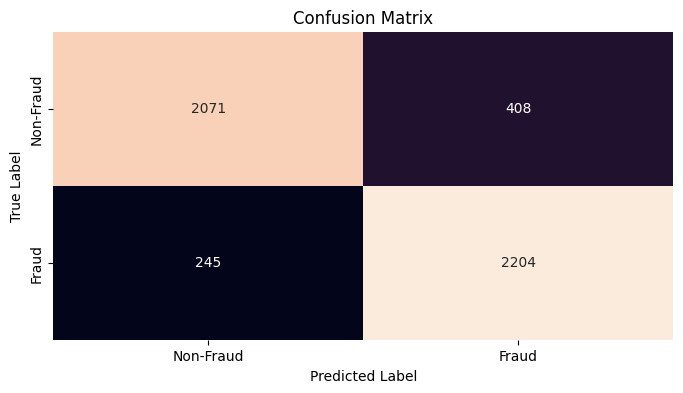

In [ ]:
conf_matrix_lr2 = confusion_matrix(y_test_sampled, y_pred_lr2)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_lr2, annot=True, fmt="d", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
cv_scores2 = cross_val_score(model_lr2, x_sampled, y_sampled, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores2)
print("Mean Accuracy:", cv_scores2.mean())

Cross-Validation Scores: [0.55661066 0.88237443 0.8569863 ]
Mean Accuracy: 0.76532379843746


### Fine Tune 3 - Regularization Strength

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create logistic regression model
base_model_lr = LogisticRegression(max_iter=1000)

# Define parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(base_model_lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_sampled, y_train_sampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'C': 100}


In [ ]:
best_C = best_params['C']

model_lr3 = LogisticRegression(C=best_C, max_iter=1000, random_state=42)
model_lr3.fit(x_train_sampled, y_train_sampled)

LogisticRegression(C=100, max_iter=1000, random_state=42)

In [ ]:
# Predictions on the test set
y_pred_lr3 = model_lr3.predict(x_test_sampled)

In [ ]:
# Evaluate the performance
accuracy_lr3 = accuracy_score(y_test_sampled, y_pred_lr3)

# Print results
print("Logistic Regression Results:")
print("Accuracy:", accuracy_lr3)

Logistic Regression Results:
Accuracy: 0.8683035714285714


In [ ]:
classification_report_lr3 = classification_report(y_test_sampled, y_pred_lr3)
print("\nClassification Report:\n", classification_report_lr3)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      2479
           1       0.84      0.90      0.87      2449

    accuracy                           0.87      4928
   macro avg       0.87      0.87      0.87      4928
weighted avg       0.87      0.87      0.87      4928



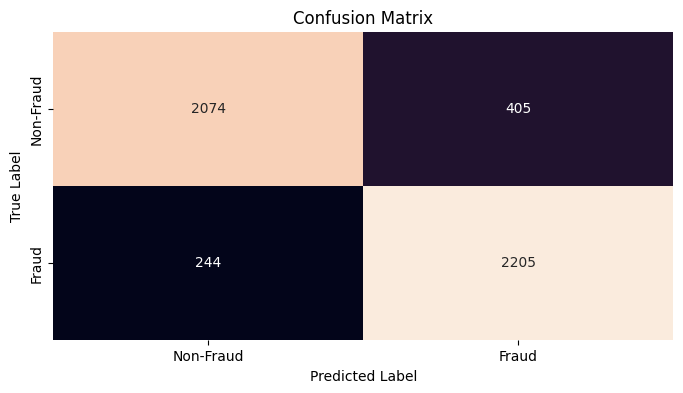

In [ ]:
conf_matrix_lr3 = confusion_matrix(y_test_sampled, y_pred_lr3)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_lr3, annot=True, fmt="d", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
cv_scores3 = cross_val_score(model_lr3, x_sampled, y_sampled, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores3)
print("Mean Accuracy:", cv_scores3.mean())

Cross-Validation Scores: [0.56081081 0.88310502 0.85917808]
Mean Accuracy: 0.7676979719445473


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Create Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluation of Random Forest

In [21]:
# Make predictions on the test set
y_pred_rf = model_rf.predict(x_test)

In [22]:
# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print results
print("Random Forest Results:")
print("Accuracy:", accuracy_rf)

Random Forest Results:
Accuracy: 0.9996998091980976


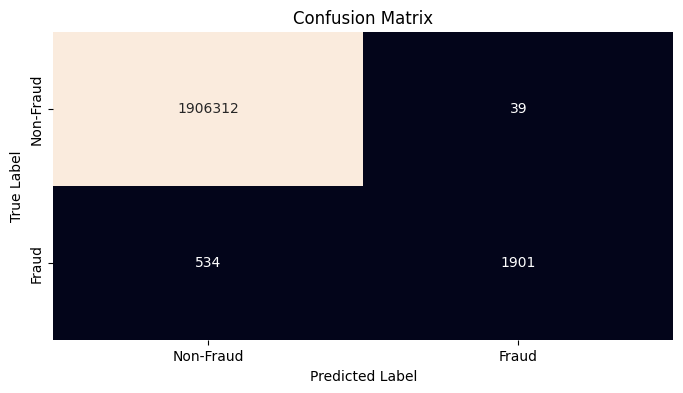

In [25]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
classification_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", classification_report_rf)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [27]:
cv_scores_rf = cross_val_score(model_rf, x, y, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean Accuracy:", cv_scores_rf.mean())

Cross-Validation Scores: [0.99916214 0.99281758 0.0129541 ]
Mean Accuracy: 0.6683112725809705


### Fine Tune 1 - Handle Imbalance Class with Data Sampling

In [42]:
# Create Random Forest model
model_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf1.fit(x_train_sampled, y_train_sampled)

RandomForestClassifier(random_state=42)

In [43]:
# Make predictions on the test set
y_pred_rf1 = model_rf1.predict(x_test_sampled)

In [44]:
# Evaluate the performance
accuracy_rf1 = accuracy_score(y_test_sampled, y_pred_rf1)

# Print results
print("Random Forest Results:")
print("Accuracy:", accuracy_rf1)

Random Forest Results:
Accuracy: 0.9910714285714286


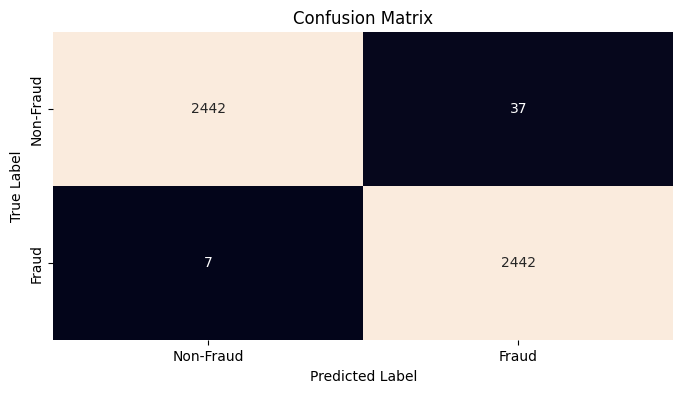

In [51]:
conf_matrix_rf1 = confusion_matrix(y_test_sampled, y_pred_rf1)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_rf1, annot=True, fmt="d", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [46]:
classification_report_rf1 = classification_report(y_test_sampled, y_pred_rf1)
print("\nClassification Report:\n", classification_report_rf1)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [47]:
cv_scores_rf1 = cross_val_score(model_rf1, x_sampled, y_sampled, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_rf1)
print("Mean Accuracy:", cv_scores_rf1.mean())

Cross-Validation Scores: [0.52392257 0.8803653  0.80986301]
Mean Accuracy: 0.738050293907384


### Fine Tune 2 - Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

base_model_rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(base_model_rf, param_grid_rf, cv=5)
grid_search_rf.fit(x_train_sampled, y_train_sampled)

best_params = grid_search_rf.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [57]:
# Access the best model from GridSearchCV
model_rf2 = grid_search_rf.best_estimator_

# Make predictions on the test set using the best model
y_pred_rf2 = model_rf2.predict(x_test_sampled)

In [58]:
# Evaluate the performance
accuracy_rf2 = accuracy_score(y_test_sampled, y_pred_rf2)

# Print results
print("Random Forest Results:")
print("Accuracy:", accuracy_rf2)

Random Forest Results:
Accuracy: 0.9910714285714286


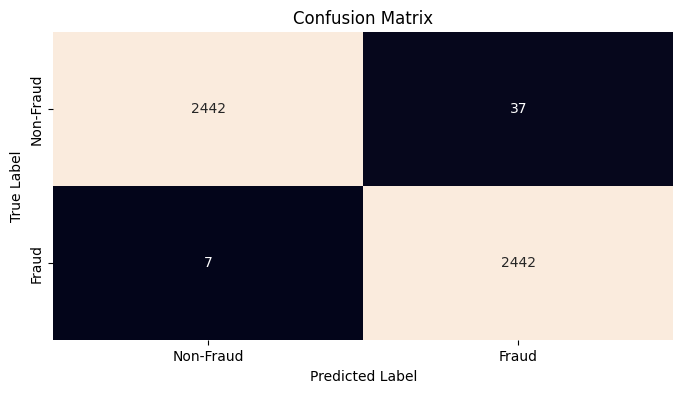

In [59]:
conf_matrix_rf2 = confusion_matrix(y_test_sampled, y_pred_rf2)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_rf2, annot=True, fmt="d", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
classification_report_rf2 = classification_report(y_test_sampled, y_pred_rf2)
print("\nClassification Report:\n", classification_report_rf2)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [61]:
cv_scores_rf2 = cross_val_score(model_rf1, x_sampled, y_sampled, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_rf2)
print("Mean Accuracy:", cv_scores_rf2.mean())

Cross-Validation Scores: [0.52392257 0.8803653  0.80986301]
Mean Accuracy: 0.738050293907384
